In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from FFNN.Model import FFNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]]) 

ffnn = FFNN(
        layers=[2, 2, 2, 1], 
        activations=["relu", "relu", "sigmoid"], 
        loss="binary_cross_entropy",
        init_method="uniform", lower=-0.5, upper=0.5, seed=42,
        l1_lambda=0.00001,
        l2_lambda=0.0003,
    )

loss = ffnn.train(X_train, y_train, epochs=5000, lr=0.1, batch_size=2, verbose=1)

y_pred = ffnn.predict(X_train)
print(y_pred)

Epoch 500/5000, Loss: 0.011330776375615513
Epoch 1000/5000, Loss: 0.0020483923580883676
Epoch 1500/5000, Loss: 0.0012328769468610157
Epoch 2000/5000, Loss: 0.0009657520481230503
Epoch 2500/5000, Loss: 0.0008471204611616385
Epoch 3000/5000, Loss: 0.0007850628535355394
Epoch 3500/5000, Loss: 0.0007484512714990333
Epoch 4000/5000, Loss: 0.0007274444581288323
Epoch 4500/5000, Loss: 0.0007144424242393374
Epoch 5000/5000, Loss: 0.0007056607901476948
[[0]
 [1]
 [1]
 [0]]


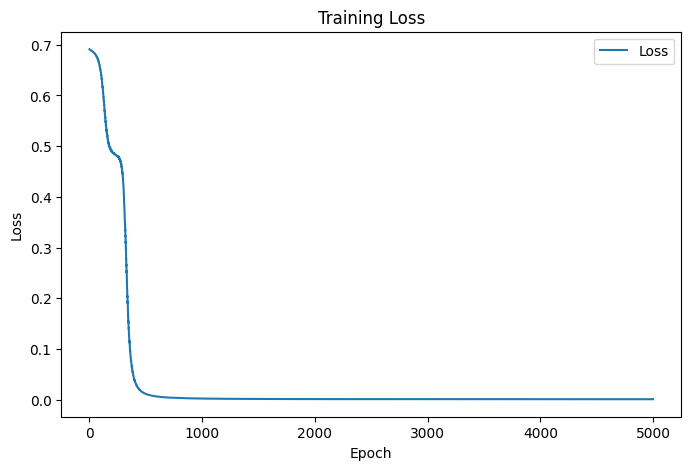

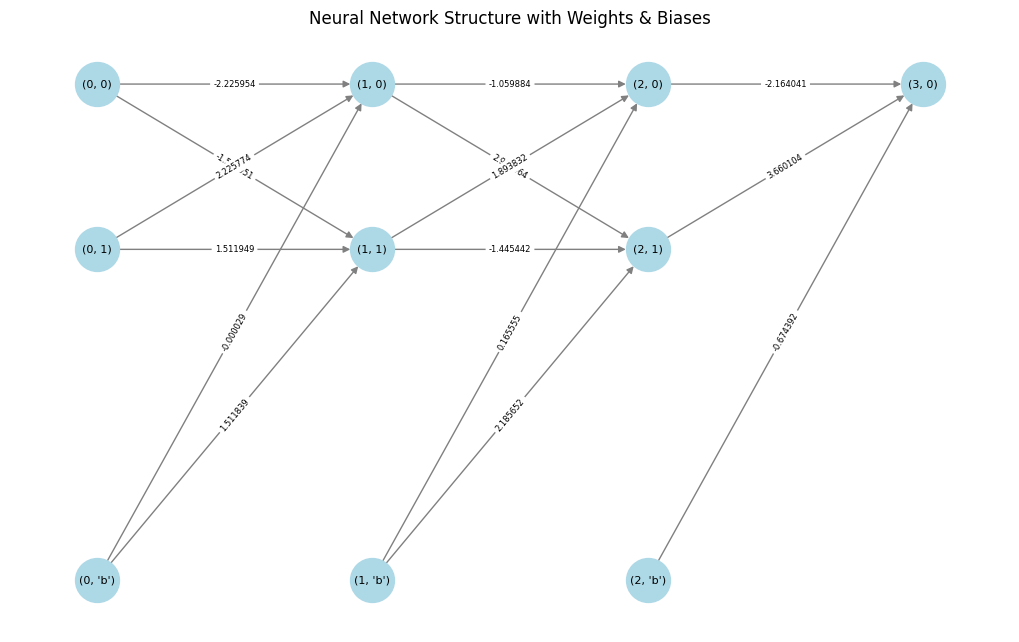

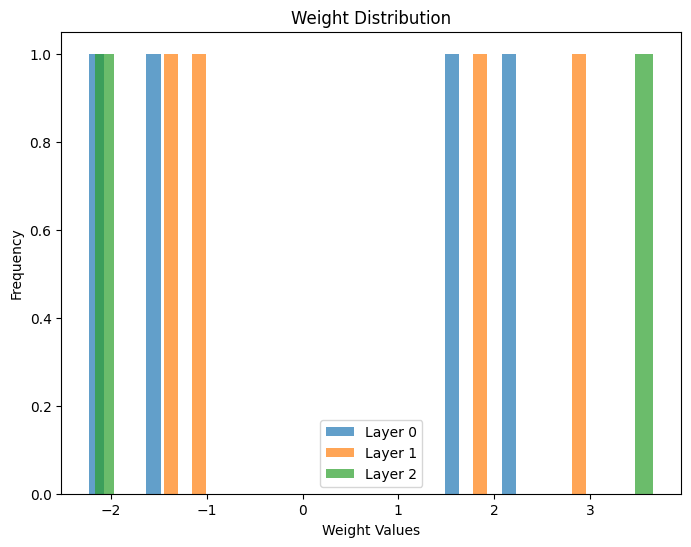

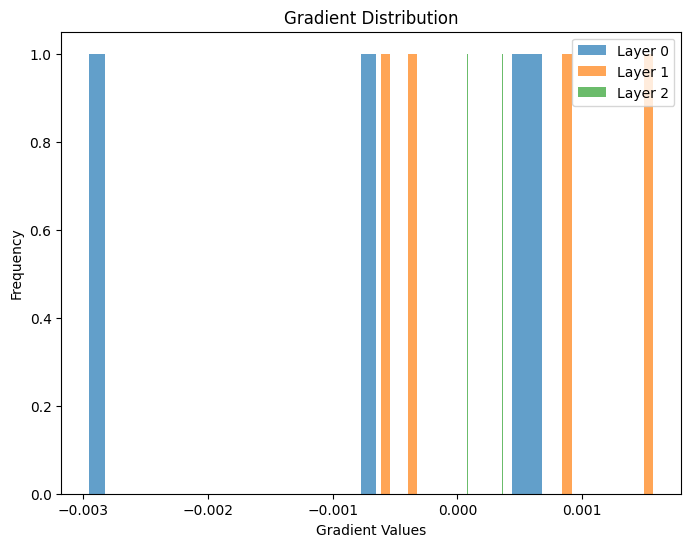

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(loss, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

ffnn.visualize_network()

ffnn.plot_weight_distribution([0, 1, 2])

ffnn.plot_gradient_distribution([0, 1, 2])

In [28]:
# Generate random dataset
num_samples = 10000
num_features = 10
num_classes = 2

X = np.random.randn(num_samples, num_features)
y = np.random.randint(0, num_classes, size=(num_samples,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = OneHotEncoder(sparse_output=False) 
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [30]:
output_size = y_train_encoded.shape[1]
layers = [X_train.shape[1], 4, 4, output_size]
activations = ['relu', 'relu', 'softmax']
loss = 'categorical_cross_entropy'

model = FFNN(layers, 
             activations, 
             loss, 
            #  l1_lambda=0.000001,
            #  l2_lambda=0.00001,
            #  rms_norm=True,
             init_method="uniform", 
             seed=42)
history = model.train(X_train, y_train_encoded, epochs=1000, lr=0.1, batch_size=100)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Epoch 100/1000, Loss: 0.6897709357309068
Epoch 200/1000, Loss: 0.6886207968814608
Epoch 300/1000, Loss: 0.6874630919085248
Epoch 400/1000, Loss: 0.6867108784550194
Epoch 500/1000, Loss: 0.6866493759245772
Epoch 600/1000, Loss: 0.6866332432993936
Epoch 700/1000, Loss: 0.6866256933040513
Epoch 800/1000, Loss: 0.6866237197988971
Epoch 900/1000, Loss: 0.6866128909916938
Epoch 1000/1000, Loss: 0.6866007446313562
Accuracy: 0.5230


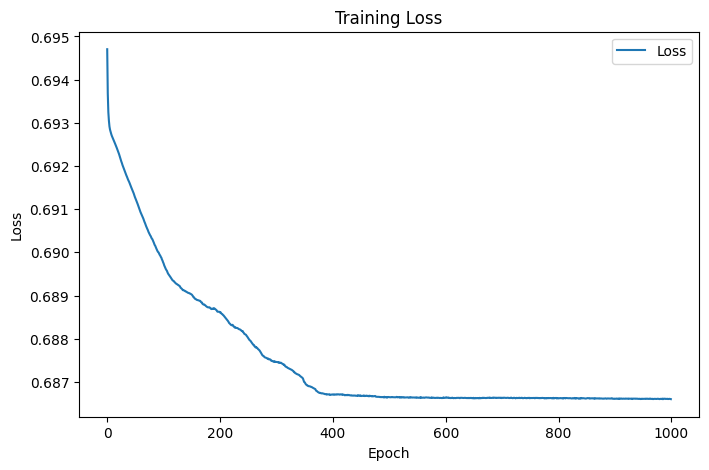

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

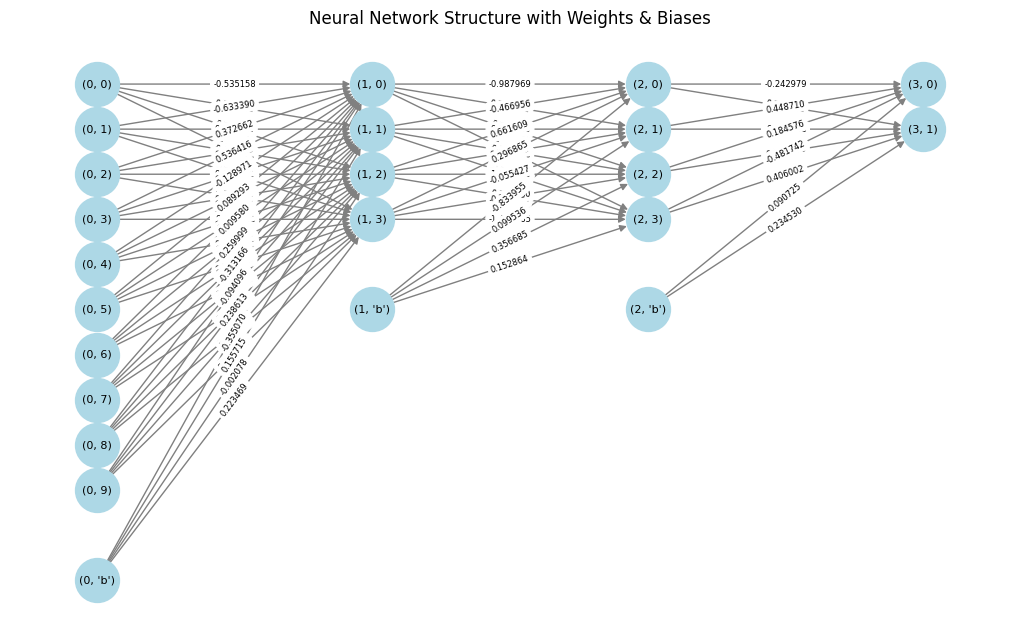

In [32]:
model.visualize_network()

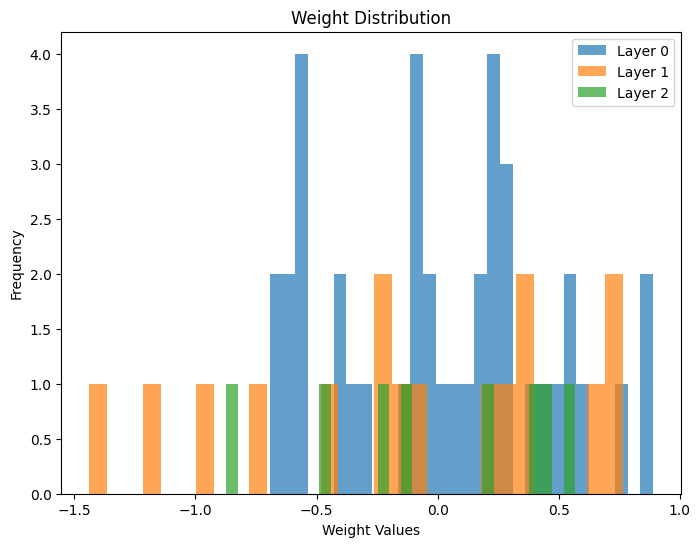

In [33]:
model.plot_weight_distribution([0, 1, 2])

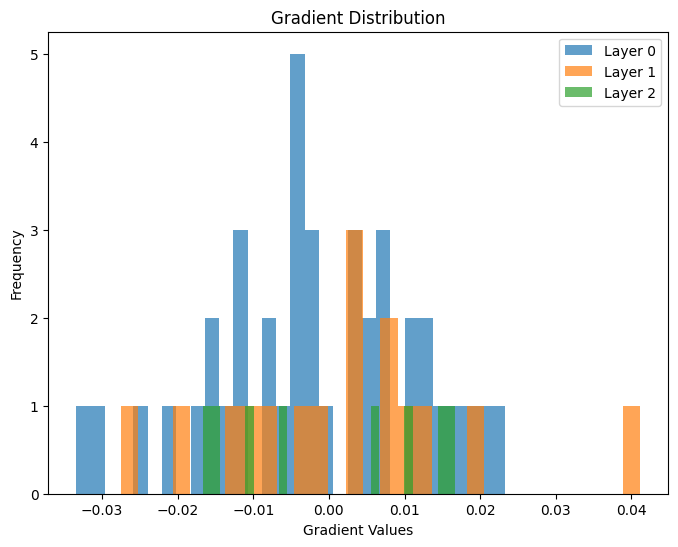

In [34]:
model.plot_gradient_distribution([0, 1, 2])

In [35]:
from sklearn.datasets import fetch_openml

np.random.seed(42)

In [36]:
def load_mnist_data(sample_size=1000):
    print("Loading MNIST dataset...")
    mnist = fetch_openml('mnist_784', version=1, parser='auto')
    X, y = mnist.data, mnist.target.astype(int)
    
    indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sampled = X.iloc[indices].values if hasattr(X, 'iloc') else X[indices]
    y_sampled = y[indices]
    
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    if hasattr(y_train, 'to_numpy'):
        y_train = y_train.to_numpy()
    if hasattr(y_test, 'to_numpy'):
        y_test = y_test.to_numpy()
    
    encoder = OneHotEncoder(sparse_output=False)
    y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_encoded = encoder.transform(y_test.reshape(-1, 1))
    
    return X_train, X_test, y_train_encoded, y_test_encoded, y_train, y_test

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def visualize_mnist_samples(X, y, num_samples=5):
    """Visualize MNIST samples"""
    plt.figure(figsize=(12, 2.5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [37]:
X_train, X_test, y_train_encoded, y_test_encoded, y_train, y_test = load_mnist_data(sample_size=1000)

Loading MNIST dataset...


Ukuran data training: (800, 784)
Ukuran label training: (800, 10)
Ukuran data testing: (200, 784)
Ukuran label testing: (200, 10)


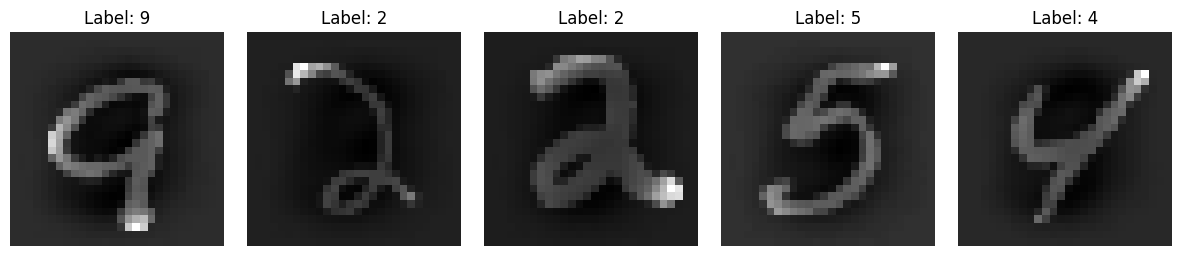

In [38]:
print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran label training: {y_train_encoded.shape}")
print(f"Ukuran data testing: {X_test.shape}")
print(f"Ukuran label testing: {y_test_encoded.shape}")

visualize_mnist_samples(X_train, y_train)


=== 1. Pengujian Pengaruh Depth dan Width ===

Testing 1 Hidden (16 neurons)...
Epoch 1/10, Loss: 2.899298979490697
Epoch 2/10, Loss: 2.493588273980083
Epoch 3/10, Loss: 2.190626771186811
Epoch 4/10, Loss: 1.9504799133636124
Epoch 5/10, Loss: 1.7538130758274475
Epoch 6/10, Loss: 1.5880251173802078
Epoch 7/10, Loss: 1.4456390016473655
Epoch 8/10, Loss: 1.3221890944626864
Epoch 9/10, Loss: 1.215869180435414
Epoch 10/10, Loss: 1.1227177926258327
Accuracy: 0.6600

Testing 1 Hidden (64 neurons)...
Epoch 1/10, Loss: 2.691248448522023
Epoch 2/10, Loss: 2.191077771555897
Epoch 3/10, Loss: 1.861552917514215
Epoch 4/10, Loss: 1.6200713482263132
Epoch 5/10, Loss: 1.4290175068742133
Epoch 6/10, Loss: 1.2724421842750937
Epoch 7/10, Loss: 1.141381997013038
Epoch 8/10, Loss: 1.0296155155689142
Epoch 9/10, Loss: 0.93353504405508
Epoch 10/10, Loss: 0.850552771056135
Accuracy: 0.6800

Testing 1 Hidden (32 neurons)...
Epoch 1/10, Loss: 2.5318749680675956
Epoch 2/10, Loss: 2.125204074587355
Epoch 3/10, L

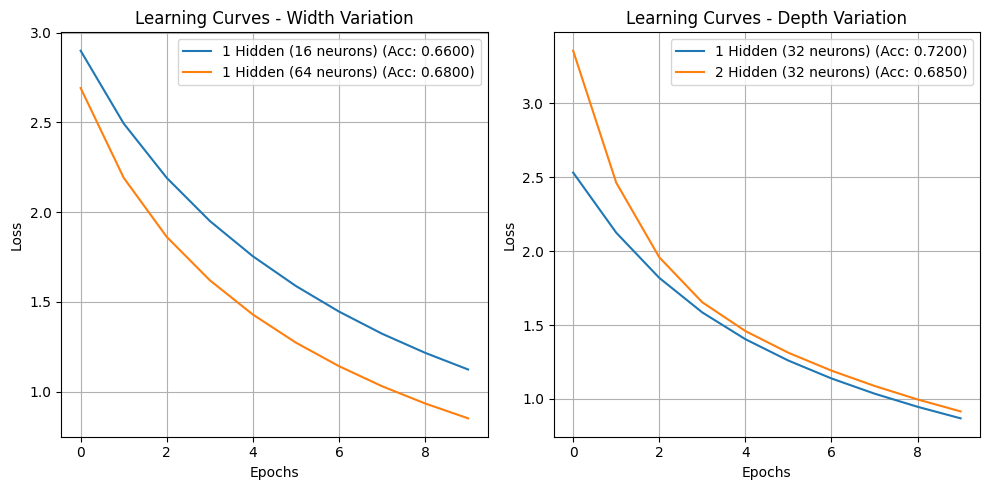

In [39]:
# =============================================================================
# 1. Pengujian Pengaruh Depth dan Width
# =============================================================================
print("\n=== 1. Pengujian Pengaruh Depth dan Width ===")

width_models = [
    {"layers": [784, 16, 10], "name": "1 Hidden (16 neurons)"},
    {"layers": [784, 64, 10], "name": "1 Hidden (64 neurons)"},
]

depth_models = [
    {"layers": [784, 32, 10], "name": "1 Hidden (32 neurons)"},
    {"layers": [784, 32, 32, 10], "name": "2 Hidden (32 neurons)"},
]

width_results = []
for config in width_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=config["layers"],
        activations=["relu"] * (len(config["layers"]) - 2) + ["softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train_encoded, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
    width_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

depth_results = []
for config in depth_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=config["layers"],
        activations=["relu"] * (len(config["layers"]) - 2) + ["softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train_encoded, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
    depth_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for result in width_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Width Variation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for result in depth_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Depth Variation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== 2. Pengujian Pengaruh Fungsi Aktivasi ===

Testing ReLU activation...
Epoch 1/10, Loss: 2.5318749680675956
Epoch 2/10, Loss: 2.125204074587355
Epoch 3/10, Loss: 1.819102793676647
Epoch 4/10, Loss: 1.5850606344616984
Epoch 5/10, Loss: 1.4039177850203886
Epoch 6/10, Loss: 1.259058118996766
Epoch 7/10, Loss: 1.138099926909978
Epoch 8/10, Loss: 1.0352249995591207
Epoch 9/10, Loss: 0.9462542074766666
Epoch 10/10, Loss: 0.8680832015011726
Accuracy: 0.7200

Testing Sigmoid activation...
Epoch 1/10, Loss: 2.605489692050361
Epoch 2/10, Loss: 2.3834115968220737
Epoch 3/10, Loss: 2.2168148625903554
Epoch 4/10, Loss: 2.084174192808821
Epoch 5/10, Loss: 1.9749601686653988
Epoch 6/10, Loss: 1.8830330472147683
Epoch 7/10, Loss: 1.8043559071188764
Epoch 8/10, Loss: 1.7358796070393283
Epoch 9/10, Loss: 1.6753714619659106
Epoch 10/10, Loss: 1.6211592292897825
Accuracy: 0.6150

Testing Tanh activation...
Epoch 1/10, Loss: 2.624403470628981
Epoch 2/10, Loss: 2.2855594453587194
Epoch 3/10, Loss: 2.007

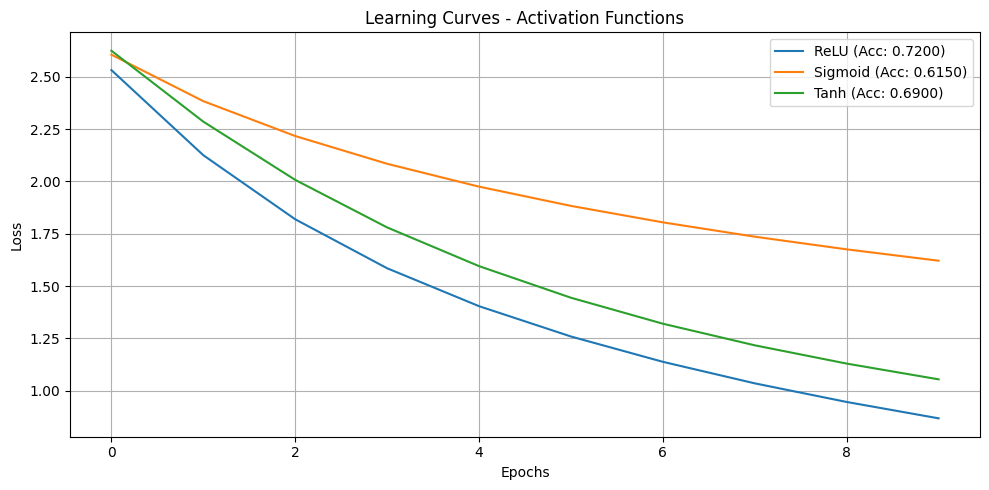

In [40]:
# =============================================================================
# 2. Pengujian Pengaruh Fungsi Aktivasi
# =============================================================================
print("\n=== 2. Pengujian Pengaruh Fungsi Aktivasi ===")

activation_models = [
    {"activation": "relu", "name": "ReLU"},
    {"activation": "sigmoid", "name": "Sigmoid"},
    {"activation": "tanh", "name": "Tanh"},
]

activation_results = []
for config in activation_models:
    print(f"\nTesting {config['name']} activation...")
    model = FFNN(
        layers=[784, 32, 10],
        activations=[config["activation"], "softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train_encoded, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
    activation_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
for result in activation_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== 3. Pengujian Pengaruh Learning Rate ===

Testing LR = 0.001...
Epoch 1/10, Loss: 3.0299290689729985
Epoch 2/10, Loss: 2.966308220734472
Epoch 3/10, Loss: 2.9049660821062275
Epoch 4/10, Loss: 2.8458022274299446
Epoch 5/10, Loss: 2.788704159899777
Epoch 6/10, Loss: 2.733547566189153
Epoch 7/10, Loss: 2.680213901801998
Epoch 8/10, Loss: 2.628632405234148
Epoch 9/10, Loss: 2.578738565741828
Epoch 10/10, Loss: 2.5304669348562756
Accuracy: 0.2150

Testing LR = 0.01...
Epoch 1/10, Loss: 2.5318749680675956
Epoch 2/10, Loss: 2.125204074587355
Epoch 3/10, Loss: 1.819102793676647
Epoch 4/10, Loss: 1.5850606344616984
Epoch 5/10, Loss: 1.4039177850203886
Epoch 6/10, Loss: 1.259058118996766
Epoch 7/10, Loss: 1.138099926909978
Epoch 8/10, Loss: 1.0352249995591207
Epoch 9/10, Loss: 0.9462542074766666
Epoch 10/10, Loss: 0.8680832015011726
Accuracy: 0.7200

Testing LR = 0.1...
Epoch 1/10, Loss: 0.9191358891967363
Epoch 2/10, Loss: 0.4717745767392465
Epoch 3/10, Loss: 0.29010972727488765
Epoch 4/10,

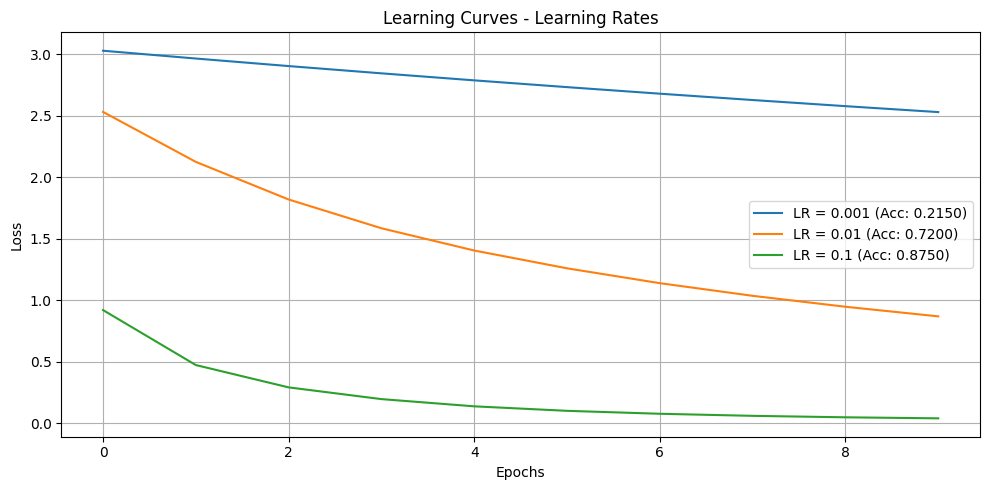

In [41]:
# =============================================================================
# 3. Pengujian Pengaruh Learning Rate
# =============================================================================
print("\n=== 3. Pengujian Pengaruh Learning Rate ===")

lr_models = [
    {"lr": 0.001, "name": "LR = 0.001"},
    {"lr": 0.01, "name": "LR = 0.01"},
    {"lr": 0.1, "name": "LR = 0.1"},
]

lr_results = []
for config in lr_models:
    print(f"\nTesting {config['name']}...")
    model = FFNN(
        layers=[784, 32, 10],
        activations=["relu", "softmax"],
        loss="categorical_cross_entropy",
        init_method="he",
        seed=42
    )
    
    history = model.train(X_train, y_train_encoded, epochs=10, lr=config["lr"], batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
    lr_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
for result in lr_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== 4. Pengujian Pengaruh Inisialisasi Bobot ===

Testing Zero initialization...
Epoch 1/10, Loss: 2.302359637327461
Epoch 2/10, Loss: 2.3021451548783567
Epoch 3/10, Loss: 2.3019410924504276
Epoch 4/10, Loss: 2.301746926027683
Epoch 5/10, Loss: 2.3015621591412985
Epoch 6/10, Loss: 2.301386321335162
Epoch 7/10, Loss: 2.301218966723566
Epoch 8/10, Loss: 2.3010596726349553
Epoch 9/10, Loss: 2.3009080383361105
Epoch 10/10, Loss: 2.300763683831541
Accuracy: 0.1500

Testing Uniform initialization...
Epoch 1/10, Loss: 8.780865546927545
Epoch 2/10, Loss: 7.980305768699395
Epoch 3/10, Loss: 7.2598705944620425
Epoch 4/10, Loss: 6.612895480745638
Epoch 5/10, Loss: 6.033815739328179
Epoch 6/10, Loss: 5.515698973576157
Epoch 7/10, Loss: 5.053223411465203
Epoch 8/10, Loss: 4.641486309480097
Epoch 9/10, Loss: 4.276698044723955
Epoch 10/10, Loss: 3.953006716279177
Accuracy: 0.2550

Testing He initialization...
Epoch 1/10, Loss: 2.5318749680675956
Epoch 2/10, Loss: 2.125204074587355
Epoch 3/10, Loss: 

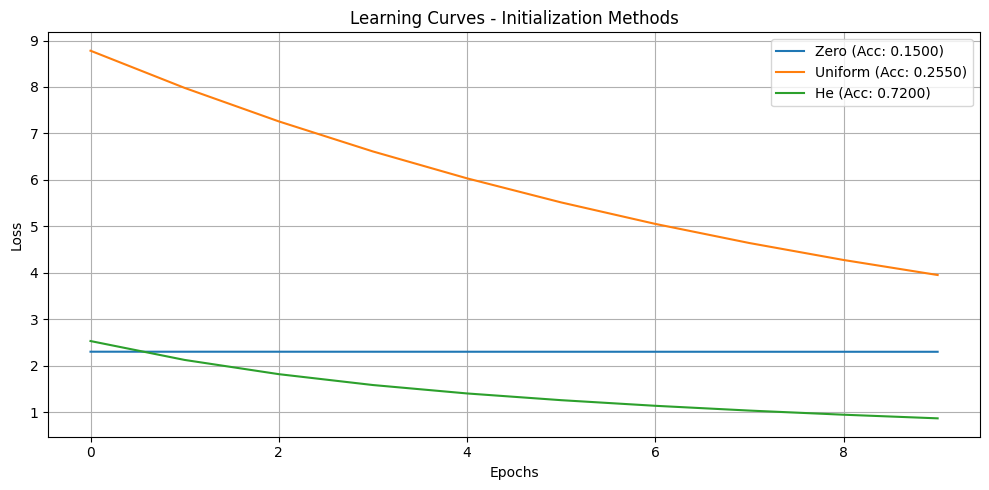

In [42]:
# =============================================================================
# 4. Pengujian Pengaruh Inisialisasi Bobot
# =============================================================================
print("\n=== 4. Pengujian Pengaruh Inisialisasi Bobot ===")

init_models = [
    {"method": "zero", "name": "Zero", "kwargs": {}},
    {"method": "uniform", "name": "Uniform", "kwargs": {"seed": 42, "lower": -0.5, "upper": 0.5}},
    {"method": "he", "name": "He", "kwargs": {"seed": 42}},
]

init_results = []
for config in init_models:
    print(f"\nTesting {config['name']} initialization...")
    model = FFNN(
        layers=[784, 32, 10],
        activations=["relu", "softmax"],
        loss="categorical_cross_entropy",
        init_method=config["method"],
        **config["kwargs"]
    )
    
    history = model.train(X_train, y_train_encoded, epochs=10, lr=0.01, batch_size=32, verbose=1)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)
    init_results.append({"config": config, "accuracy": accuracy, "history": history})
    
    print(f"Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 5))
for result in init_results:
    plt.plot(result["history"], label=f"{result['config']['name']} (Acc: {result['accuracy']:.4f})")
plt.title("Learning Curves - Initialization Methods")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()